In [339]:
import numpy as np
from datetime import datetime, timedelta
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [233]:
data = np.genfromtxt("data.csv", delimiter=",", dtype=None, encoding="UTF-8")

In [234]:
class Voter:
    def __init__(self, canidates, dt, normal, ranks):
        self.candidates = canidates
        self.dt = dt
        self.normal = normal
        self.voting_list = []
        for i in range(1, len(ranks)+1):
            try:
                j = ranks.index(i)
                self.voting_list += [candidates[j]]
            except ValueError:
                pass
    
    def vote(self, rejects=[]):
        for el in self.voting_list:
            if el not in rejects:
                return el
        return None
    
    def __getitem__(self, i):
        return self.voting_list[i]
    
    def __len__(self):
        return len(self.voting_list)

        
class Candidate:
    def __init__(self, i, name):
        self.i = i
        self.name = name
    
    def s(self):
        return self.name.split(" ")[0]
    
    def __repr__(self):
        return "Candidate({}, {})".format(self.i, self.name)
    
    def __str__(self):
        return self.name
    
def summary(candidates, votes):
    for candidate in candidates:
        print(candidate, votes.count(candidate))
        
def get_candidate(search):
    for candidate in candidates:
        if search in candidate.name:
            return candidate

In [235]:
candidates = []
for i, el in enumerate(data[0][1:-1]):
    candidates += [Candidate(i+1, el[51:-1])]
print(candidates)
none_cand = Candidate(0, None)

[Candidate(1, BIEDROŃ Robert), Candidate(2, BOSAK Krzysztof), Candidate(3, DUDA Andrzej Sebastian), Candidate(4, HOŁOWNIA Szymon Franciszek), Candidate(5, JAKUBIAK Marek), Candidate(6, KOSINIAK-KAMYSZ Władysław Marcin), Candidate(7, PIOTROWSKI Mirosław Mariusz), Candidate(8, TANAJNO Paweł Jan), Candidate(9, TRZASKOWSKI Rafał Kazimierz), Candidate(10, WITKOWSKI Waldemar Włodzimierz), Candidate(11, ŻÓŁTEK Stanisław Józef)]


In [236]:
voters = []
for row in data[1:]:
    dt = datetime.strptime(row[0], "%d/%m/%Y %H:%M:%S")
    try:
        normal = [x for x in candidates if x.name == row[-1]][0]
    except IndexError:
        normal = none_cand
    ranks = [int(x) if x!="" else None for x in row[1:-1]]
    voters += [Voter(candidates, dt, normal, ranks)]

In [237]:
[[y.name for y in x.voting_list] for x in voters][3]

['HOŁOWNIA Szymon Franciszek',
 'WITKOWSKI Waldemar Włodzimierz',
 'BIEDROŃ Robert',
 'KOSINIAK-KAMYSZ Władysław Marcin',
 'TRZASKOWSKI Rafał Kazimierz',
 'TANAJNO Paweł Jan',
 'ŻÓŁTEK Stanisław Józef',
 'PIOTROWSKI Mirosław Mariusz',
 'JAKUBIAK Marek',
 'DUDA Andrzej Sebastian',
 'BOSAK Krzysztof']

In [239]:
rejects = []
for k in range(15):
    print("-"*25)
#     print(rejects)
    votes = [x.vote(rejects) for x in voters]
    nvotes = [votes.count(candidate) for candidate in candidates]
    total = len(votes)
    
    for i in range(len(candidates)):
        print(candidates[i], nvotes[i])
    
    if np.amax(nvotes)/total > 0.5:
        winner = candidates[np.argmax(nvotes)]
        print("The winner is {} with {:.2f}% of the vote".format(winner, np.amax(nvotes)/total*100))
        break
    else:
        reject = None
        minv = np.inf
        for i in range(len(nvotes)):
#             print(nvotes[i], candidates[i])
            if nvotes[i] < minv and candidates[i] not in rejects:
                reject = candidates[i]
                minv = nvotes[i]
        rejects += [reject]
        print("We reject {} with {:.2f}% of the vote".format(reject, minv/total*100))

-------------------------
BIEDROŃ Robert 73
BOSAK Krzysztof 21
DUDA Andrzej Sebastian 3
HOŁOWNIA Szymon Franciszek 45
JAKUBIAK Marek 0
KOSINIAK-KAMYSZ Władysław Marcin 6
PIOTROWSKI Mirosław Mariusz 1
TANAJNO Paweł Jan 0
TRZASKOWSKI Rafał Kazimierz 70
WITKOWSKI Waldemar Włodzimierz 20
ŻÓŁTEK Stanisław Józef 7
We reject JAKUBIAK Marek with 0.00% of the vote
-------------------------
BIEDROŃ Robert 73
BOSAK Krzysztof 21
DUDA Andrzej Sebastian 3
HOŁOWNIA Szymon Franciszek 45
JAKUBIAK Marek 0
KOSINIAK-KAMYSZ Władysław Marcin 6
PIOTROWSKI Mirosław Mariusz 1
TANAJNO Paweł Jan 0
TRZASKOWSKI Rafał Kazimierz 70
WITKOWSKI Waldemar Włodzimierz 20
ŻÓŁTEK Stanisław Józef 7
We reject TANAJNO Paweł Jan with 0.00% of the vote
-------------------------
BIEDROŃ Robert 73
BOSAK Krzysztof 21
DUDA Andrzej Sebastian 3
HOŁOWNIA Szymon Franciszek 45
JAKUBIAK Marek 0
KOSINIAK-KAMYSZ Władysław Marcin 6
PIOTROWSKI Mirosław Mariusz 1
TANAJNO Paweł Jan 0
TRZASKOWSKI Rafał Kazimierz 70
WITKOWSKI Waldemar Włodzimierz

In [240]:
b = [v for v in voters if len(v) and v[0]==get_candidate("HOŁ")]
summary(candidates, [v[1] for v in b if len(v)>0])

BIEDROŃ Robert 9
BOSAK Krzysztof 8
DUDA Andrzej Sebastian 0
HOŁOWNIA Szymon Franciszek 0
JAKUBIAK Marek 0
KOSINIAK-KAMYSZ Władysław Marcin 2
PIOTROWSKI Mirosław Mariusz 0
TANAJNO Paweł Jan 1
TRZASKOWSKI Rafał Kazimierz 21
WITKOWSKI Waldemar Włodzimierz 4
ŻÓŁTEK Stanisław Józef 0


In [241]:
summary(candidates, [v.vote() for v in voters])

BIEDROŃ Robert 73
BOSAK Krzysztof 21
DUDA Andrzej Sebastian 3
HOŁOWNIA Szymon Franciszek 45
JAKUBIAK Marek 0
KOSINIAK-KAMYSZ Władysław Marcin 6
PIOTROWSKI Mirosław Mariusz 1
TANAJNO Paweł Jan 0
TRZASKOWSKI Rafał Kazimierz 70
WITKOWSKI Waldemar Włodzimierz 20
ŻÓŁTEK Stanisław Józef 7


In [242]:
# http://sankeymatic.com/build/
rejects = []
tab = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#000', '#9467bd', '#8c564b', '#000',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
tab = ['#1b1462', '#d62728', '#2ca02c', '#f9c013', '#000', '#9467bd', '#e377c2', '', '#ff7f0e', '#17becf', '#bcbd22']
# fmt = lambda x: str(x)[:4] + "."
fmt = lambda x: str(x).split(" ")[0]
for r in range(11):
    
    if r:
        for i in range(len(candidates)):
            if nvotes[i] and candidates[i] not in rejects:
                print("{}. {} [{}] {}. {} {}.1".format(r-1, fmt(candidates[i]), nvotes[i], r, fmt(candidates[i]), tab[i]))
    
    for candidate in candidates:
        if candidate not in rejects:
            print(":{}. {} {}".format(r, fmt(candidate), tab[candidate.i-1]))
    
    votes = [x.vote(rejects) for x in voters]
    nvotes = [votes.count(candidate) for candidate in candidates]
    total = len(votes)
        
    if np.amax(nvotes)/total > 0.5:
        print(":{}. NIKT #aeaeae".format(r))
        pass
    else:
        print("{}. NIKT [{}] {}. NIKT".format(r, votes.count(None), r+1))
        print(":{}. NIKT #aeaeae".format(r))
        reject = None
        minv = np.inf
        for i in range(len(nvotes)):
            if nvotes[i] < minv and candidates[i] not in rejects:
                reject = candidates[i]
                minv = nvotes[i]
        voters_rejected = [x for x in voters if x.vote(rejects) == reject]
        rejects += [reject]
        rvotes = [x.vote(rejects) for x in voters_rejected]
        rnvotes = [rvotes.count(candidate) for candidate in candidates]
        for i in range(len(candidates)):
            if rnvotes[i]:
                print("{}. {} [{}] {}. {}".format(r, fmt(reject), rnvotes[i], r+1, fmt(candidates[i])))
        noped = rvotes.count(None)
#         print("noped", noped)
        if noped:
            print("{}. {} [{}] {}. NIKT".format(r, fmt(reject), noped, r+1))

:0. BIEDROŃ #1b1462
:0. BOSAK #d62728
:0. DUDA #2ca02c
:0. HOŁOWNIA #f9c013
:0. JAKUBIAK #000
:0. KOSINIAK-KAMYSZ #9467bd
:0. PIOTROWSKI #e377c2
:0. TANAJNO 
:0. TRZASKOWSKI #ff7f0e
:0. WITKOWSKI #17becf
:0. ŻÓŁTEK #bcbd22
0. NIKT [7] 1. NIKT
:0. NIKT #aeaeae
0. BIEDROŃ [73] 1. BIEDROŃ #1b1462.1
0. BOSAK [21] 1. BOSAK #d62728.1
0. DUDA [3] 1. DUDA #2ca02c.1
0. HOŁOWNIA [45] 1. HOŁOWNIA #f9c013.1
0. KOSINIAK-KAMYSZ [6] 1. KOSINIAK-KAMYSZ #9467bd.1
0. PIOTROWSKI [1] 1. PIOTROWSKI #e377c2.1
0. TRZASKOWSKI [70] 1. TRZASKOWSKI #ff7f0e.1
0. WITKOWSKI [20] 1. WITKOWSKI #17becf.1
0. ŻÓŁTEK [7] 1. ŻÓŁTEK #bcbd22.1
:1. BIEDROŃ #1b1462
:1. BOSAK #d62728
:1. DUDA #2ca02c
:1. HOŁOWNIA #f9c013
:1. KOSINIAK-KAMYSZ #9467bd
:1. PIOTROWSKI #e377c2
:1. TANAJNO 
:1. TRZASKOWSKI #ff7f0e
:1. WITKOWSKI #17becf
:1. ŻÓŁTEK #bcbd22
1. NIKT [7] 2. NIKT
:1. NIKT #aeaeae
1. BIEDROŃ [73] 2. BIEDROŃ #1b1462.1
1. BOSAK [21] 2. BOSAK #d62728.1
1. DUDA [3] 2. DUDA #2ca02c.1
1. HOŁOWNIA [45] 2. HOŁOWNIA #f9c013.1
1. KOS

# Pie chart

In [243]:
candidates

[Candidate(1, BIEDROŃ Robert),
 Candidate(2, BOSAK Krzysztof),
 Candidate(3, DUDA Andrzej Sebastian),
 Candidate(4, HOŁOWNIA Szymon Franciszek),
 Candidate(5, JAKUBIAK Marek),
 Candidate(6, KOSINIAK-KAMYSZ Władysław Marcin),
 Candidate(7, PIOTROWSKI Mirosław Mariusz),
 Candidate(8, TANAJNO Paweł Jan),
 Candidate(9, TRZASKOWSKI Rafał Kazimierz),
 Candidate(10, WITKOWSKI Waldemar Włodzimierz),
 Candidate(11, ŻÓŁTEK Stanisław Józef)]

<IPython.core.display.Javascript object>


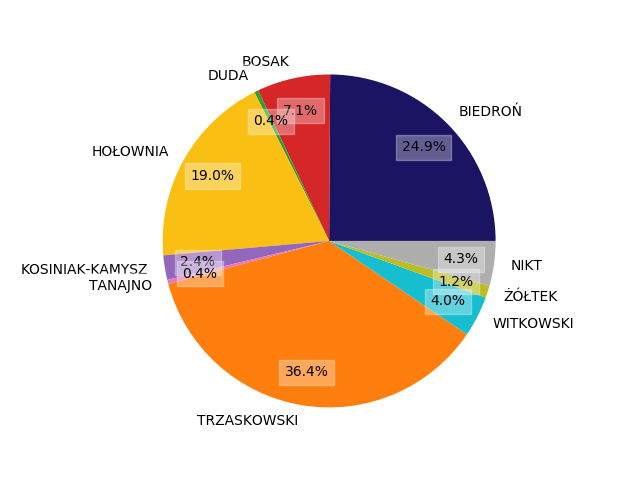

In [384]:
fig, ax = plt.subplots()
tab2 = ['#1b1462', '#d62728', '#2ca02c', '#f9c013', '#9467bd', '#e377c2', '#ff7f0e', '#17becf', '#bcbd22', "#aeaeae"]
normal = [x.normal for x in voters]
ax.pie([normal.count(x) for x in candidates+[none_cand] if normal.count(x)], labels=[x.name.split(" ")[0] for x in candidates if normal.count(x)]+["NIKT"],
       autopct='%1.1f%%', colors=tab2, pctdistance=0.8, textprops={"backgroundcolor":"#ffffff50"})
ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


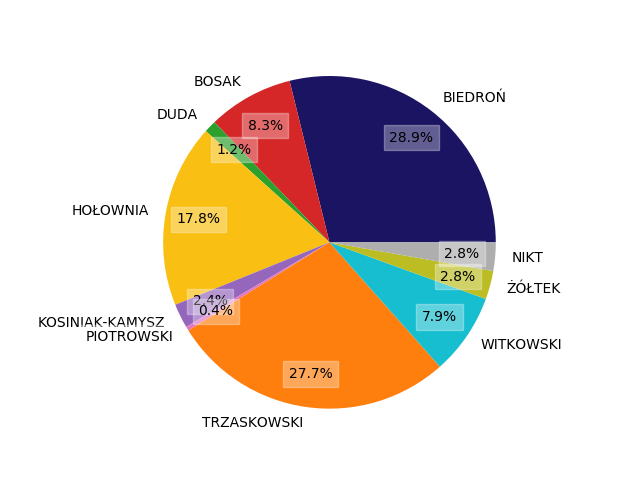

In [383]:
fig, ax = plt.subplots()
tab2 = ['#1b1462', '#d62728', '#2ca02c', '#f9c013', '#9467bd', '#e377c2', '#ff7f0e', '#17becf', '#bcbd22', "#aeaeae"]
normal = [x.vote() for x in voters]
ax.pie([normal.count(x) for x in candidates+[None] if normal.count(x)], labels=[x.name.split(" ")[0] for x in candidates if normal.count(x)]+["NIKT"],
       autopct='%1.1f%%', colors=tab2, pctdistance=0.8, textprops={"backgroundcolor":"#ffffff50"})
ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


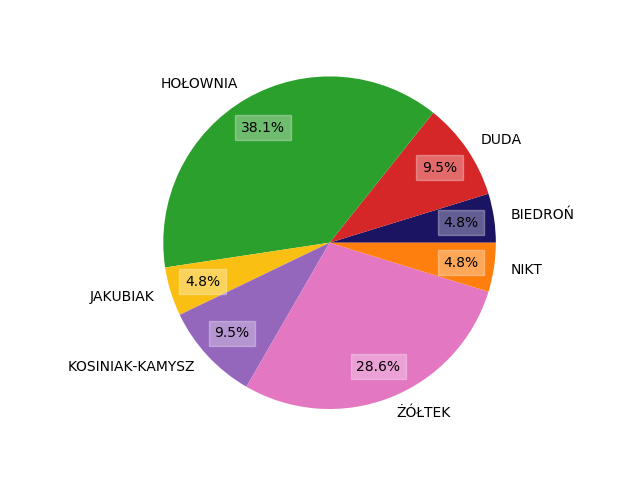

In [387]:
fig, ax = plt.subplots()
tab2 = ['#1b1462', '#d62728', '#2ca02c', '#f9c013', '#9467bd', '#e377c2', '#ff7f0e', '#17becf', '#bcbd22', "#aeaeae"]
rejects = [get_candidate("BOS")]
normal = [x.vote(rejects) for x in voters if x.vote() in rejects]
ax.pie([normal.count(x) for x in candidates+[None] if normal.count(x)], labels=[x.name.split(" ")[0] for x in candidates if normal.count(x)] + ["NIKT"],
       autopct='%1.1f%%', colors=tab2, pctdistance=0.8, textprops={"backgroundcolor":"#ffffff50"})
ax.axis('equal')
plt.show()

# Time histogram?

<IPython.core.display.Javascript object>


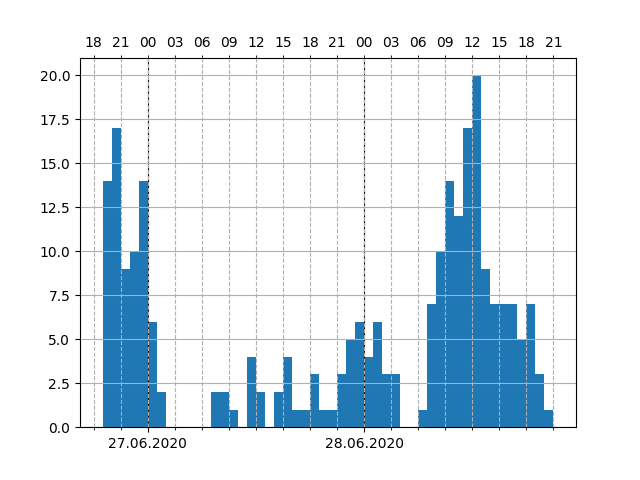

In [382]:
fig, ax = plt.subplots()
# ax.hist(mdates.date2num([x.dt for x in voters]), bins=50)
start = datetime(2020,6,26,19)
ax.hist(mdates.date2num([x.dt for x in voters]), bins=mdates.date2num([start+i*timedelta(hours=1) for i in range(51)]))


ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0,24,3)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
ax.grid(which='minor', ls="--")
ax.grid(which='major', axis='x', ls="-", c='black')
ax.grid(which='major', axis='y')
ax.tick_params(which="minor", top=True, labeltop=True, labelbottom=False)
plt.show()